In [1]:
# Imports for gplearn and pydotplus in order to see graph view

In [2]:

from IPython.display import Image
import pydotplus

from gplearn.genetic import SymbolicRegressor
from gplearn.fitness import make_fitness

In [3]:
#--Import the required libraries--
import math
import random
import matplotlib.pyplot as plt
import numpy as np

#--debug mode to report on evaluation of tree--
debug_eval = False



# Import Scipy generic dataset 
* Number of Instances:506
* Number of Attributes:13
* Attribute Information (in order):


<li>CRIM     per capita crime rate by town</li>
<li>ZN       proportion of residential land zoned for lots over 25,000 sq.ft.</li>
<li>INDUS    proportion of non-retail business acres per town</li>
<li>CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</li>
<li>NOX      nitric oxides concentration (parts per 10 million)</li>
<li>RM       average number of rooms per dwelling</li>
<li>AGE      proportion of owner-occupied units built prior to 1940</li>
<li>DIS      weighted distances to five Boston employment centres</li>
<li>RAD      index of accessibility to radial highways</li>
<li>TAX      full-value property-tax rate per \\$10,000</li>
<li>PTRATIO  pupil-teacher ratio by town</li>
<li>B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town</li>
<li>LSTAT    \\% lower status of the population</li>
<li>MEDV     Median value of owner-occupied homes in $1000’s</li>

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

#load the data from the default data set, and split it into a tuple
data = load_boston(return_X_y = True)

#what percent of our data do we want to use to validate
split_percent = 0.2
train_x, test_x, train_y, test_y = train_test_split(*data, test_size = split_percent, random_state = 0)

#print out the shapes for clarity
print("Shapes:\n data_x:{}\n data_y:{}\n train_x:{}\n test_x:{}\n train_y:{}\n test_y:{}"
      .format(data[0].shape,data[1].shape,train_x.shape,test_x.shape,train_y.shape,test_y.shape))

Shapes:
 data_x:(506, 13)
 data_y:(506,)
 train_x:(404, 13)
 test_x:(102, 13)
 train_y:(404,)
 test_y:(102,)


# Symbolic regression

We run a symbolic regression on a 1000 individuals for 20 generations. There are three kinds of mutation, subtree, hoist, and point. The hoist mutation is the only type that differs significantly from what was talked about in class. In it, a random subtree is selected, then, a random subtree from within it is lifted to it’s root node. It is used to combat tree bloat, and it appears to be very effective. Without the hoist mutation, tree trees grew like redwoods.

In [14]:
gp_clf = SymbolicRegressor
est_gp.get_params()

{'const_range': (-1.0, 1.0),
 'function_set': ('add', 'sub', 'mul', 'div', 'sin', 'log', 'sqrt'),
 'generations': 10,
 'init_depth': (4, 10),
 'init_method': 'half and half',
 'max_samples': 0.6,
 'metric': 'rmse',
 'n_jobs': 1,
 'p_crossover': 0.9,
 'p_hoist_mutation': 0.01,
 'p_point_mutation': 0.01,
 'p_point_replace': 0.05,
 'p_subtree_mutation': 0.01,
 'parsimony_coefficient': 0.001,
 'population_size': 1000,
 'random_state': 0,
 'stopping_criteria': 0,
 'tournament_size': 20,
 'verbose': 1,
 'warm_start': True}

In [ ]:
parameters = {'tournament_size': [5, 10, 20], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

In [6]:
#This part sets up the symbolic regressor
est_gp = SymbolicRegressor(population_size=1000,
                           generations=10,
                           tournament_size=20,
                           init_depth = (4,10),
                           stopping_criteria=0,
                           p_crossover=0.9,
                           p_subtree_mutation=0.01,
                           p_hoist_mutation=0.01,
                           p_point_mutation=0.01,
                           max_samples=0.6,
                           verbose=1,
                           parsimony_coefficient=0.001,
                           random_state=0,
                           metric = 'rmse',
                           function_set=('add', 'sub', 'mul', 'div',"sin","log","sqrt"),
                           n_jobs = 1,
                           warm_start = True
                           )
#This part runs it on our data
est_gp.fit(train_x, train_y)

    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     47.5 5672380.686370775        3 7.914068088192119 8.424603084216713      8.03s
   1    21.61 1069.257397686192       13 7.521314420186005 8.231246311541314      8.26s
   2    13.78 48.726099512246364        3 7.367016100429776 9.135735121076797      6.41s
   3     7.09 154.5193487661938       10 7.170571199558228 8.279040343749024      5.09s
   4      6.7 60.493950275240884       17 7.1931134061503075 7.909022291806752      3.94s
   5     7.73 35.84835437084394       24 6.882821651620888 8.044538124738072      3.15s
   6     10.5 508.5748430962856       13 6.825548636086404 8.641845006539969      2.44s
   7    14.73 648.7654819173683       17 6.480102103936996 8.521035671338753      1.75s
   8    19.32 976.7880126865084       23 6.50977

SymbolicRegressor(const_range=(-1.0, 1.0),
         function_set=('add', 'sub', 'mul', 'div', 'sin', 'log', 'sqrt'),
         generations=10, init_depth=(4, 10), init_method='half and half',
         max_samples=0.6, metric='rmse', n_jobs=1, p_crossover=0.9,
         p_hoist_mutation=0.01, p_point_mutation=0.01,
         p_point_replace=0.05, p_subtree_mutation=0.01,
         parsimony_coefficient=0.001, population_size=1000, random_state=0,
         stopping_criteria=0, tournament_size=20, verbose=1,
         warm_start=True)

In [7]:
est_gp.get_params()

{'const_range': (-1.0, 1.0),
 'function_set': ('add', 'sub', 'mul', 'div', 'sin', 'log', 'sqrt'),
 'generations': 10,
 'init_depth': (4, 10),
 'init_method': 'half and half',
 'max_samples': 0.6,
 'metric': 'rmse',
 'n_jobs': 1,
 'p_crossover': 0.9,
 'p_hoist_mutation': 0.01,
 'p_point_mutation': 0.01,
 'p_point_replace': 0.05,
 'p_subtree_mutation': 0.01,
 'parsimony_coefficient': 0.001,
 'population_size': 1000,
 'random_state': 0,
 'stopping_criteria': 0,
 'tournament_size': 20,
 'verbose': 1,
 'warm_start': True}

# Scoring
Returns the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [8]:
 print(est_gp._program)
est_gp.score(test_x,test_y)

add(sqrt(sub(log(sub(sub(add(X3, X4), sub(sqrt(X1), mul(X11, X9))), sqrt(sqrt(X11)))), sub(add(sin(X8), add(div(X11, X10), X10)), X12))), div(X11, X10))


0.007847751037333817

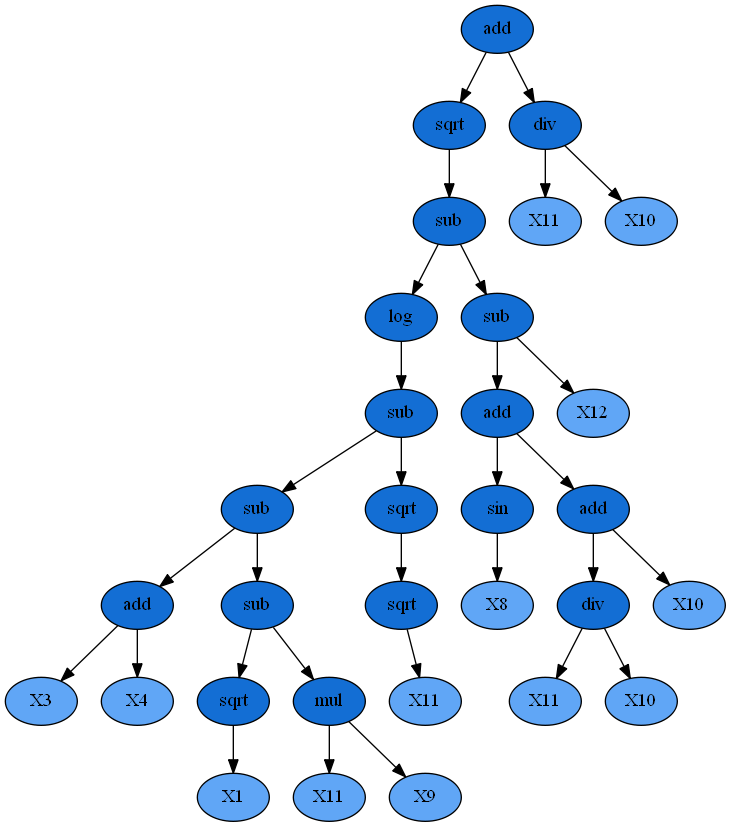

In [9]:
graph = pydotplus.graphviz.graph_from_dot_data(est_gp._program.export_graphviz())
Image(graph.create_png())